# Meta-Heuríticas : Trabalho Prático 1 

- Aymê Faustino dos Santos - 4704
- Pedro Augusto Martins Pereira - 4692
- Henrique Alves Campos - 4231

O trabalho consiste em implementar duas meta-heuríticas para minimizar duas funções objetivo, cada uma em dois intervalos diferentes, sendo o segundo, um intervado mais restrito contido no primeiro intervalo.

## Bibliotecas Necessarias

In [66]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Funções Objetivo 

### 1.1 Representação da Solução

Vamos utilizar um vetor para representar as variáveis de decisão. Na função objetivo 1 ele terá tamanho dois pois temos duas variaveis de decisão poŕem na função objetivo 2 temos quatro variaveis de decisão sendo assim ele terá tamanho quatro.

### 1.2 Função Objetivo 1



1.2.1 Intervalos 

a) - 100 <= x1 e x2 <= 100

b) -20 <= x1 e x2 <= 20

In [44]:
def funcao_objetivo_01(solucao):
    sum_sq = np.sum(np.square(solucao))
    raiz = np.sqrt(sum_sq)
    return 1 - np.cos(2 * np.pi * raiz) + 0.1 * raiz

intervalo1_a = [-100,100]
intervalo1_b = [-20,20]

1.2.2 Superficie

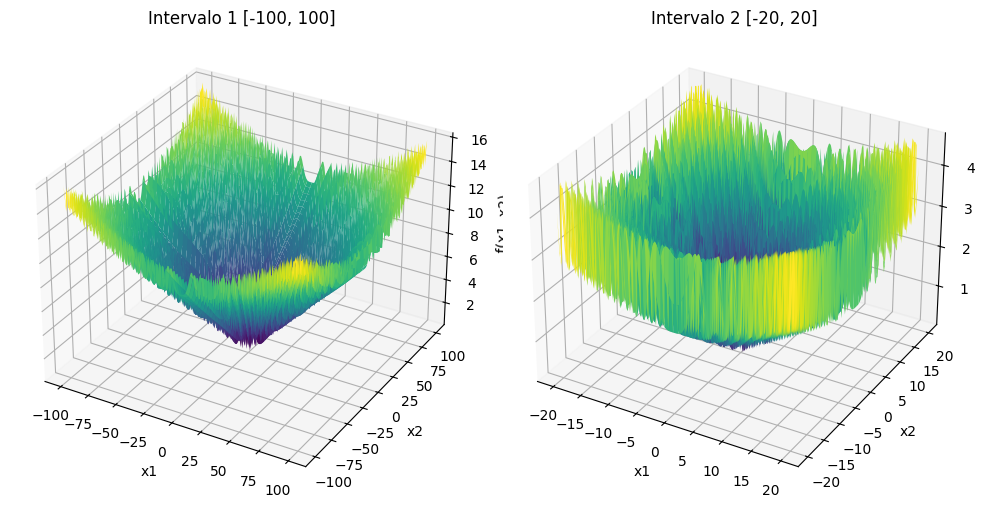

In [30]:
def plotar_superficies(intervalos, titulos):
    fig = plt.figure(figsize=(10, 5))  

    for i, (intervalo, titulo) in enumerate(zip(intervalos, titulos), start=1):
        x = np.linspace(intervalo[0], intervalo[1], 200)
        y = np.linspace(intervalo[0], intervalo[1], 200)
        X, Y = np.meshgrid(x, y)

        Z = np.array([[funcao_objetivo_01([x_, y_]) for x_, y_ in zip(x_row, y_row)] 
                      for x_row, y_row in zip(X, Y)])

        ax = fig.add_subplot(1, 2, i, projection='3d')  # 1 linha, 2 colunas
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_title(titulo)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('f(x1, x2)')

    plt.tight_layout()
    plt.show()

intervalos = [(-100, 100), (-20, 20)]
titulos = ['Intervalo 1 [-100, 100]', 'Intervalo 2 [-20, 20]']
plotar_superficies(intervalos, titulos)

### 1.3 Função Objetivo 2

1.3.1 Intervalos

a)−10 ≤ 𝑥1, 𝑥2, 𝑥3, 𝑥4 ≤ 10

b)−2 ≤ 𝑥1, 𝑥2, 𝑥3, 𝑥4 ≤ 2

In [46]:
def funcao_objetivo_02(x):
    return (100 * (x[0]**2 - x[1])**2 +
            (x[0] - 1)**2 +
            (x[2] - 1)**2 +
            90 * (x[2]**2 - x[3])**2 +
            10.1 * ((x[1] - 1)**2 + (x[3] - 1)**2) +
            19.8 * (x[1] - 1) * (x[3] - 1))

intervalo2_a = [-10,10]
intervalo2_b = [-2,2]

1.3.2 Superficie

Como a função f(x) depende de quatro variáveis, foi necessário fixar x₃ e x₄ para permitir a visualização em 3D. Assim, foi possível analisar o comportamento da função variando apenas x₁ e x₂.

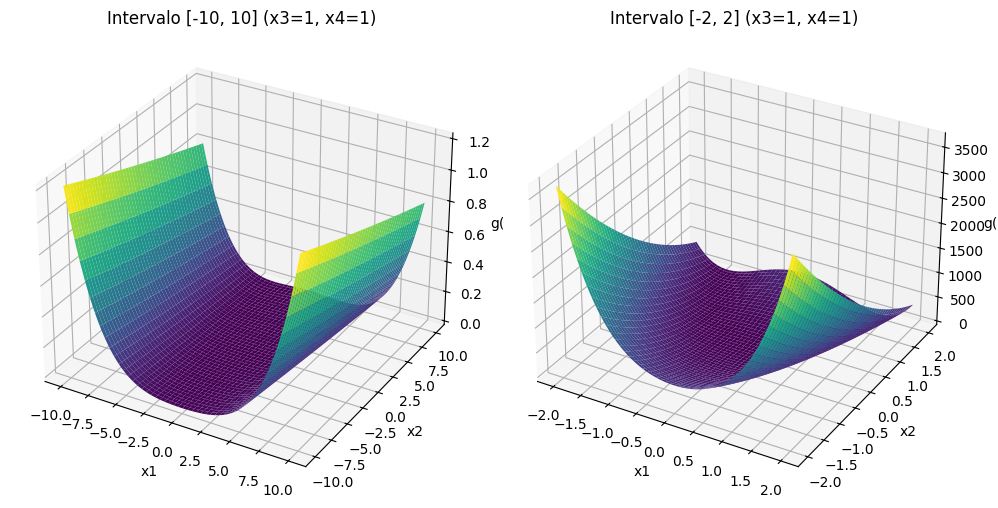

In [ ]:
def plotar_superficies_2(intervalos, titulos, x3=1, x4=1):
    fig = plt.figure(figsize=(10, 5))

    for i, (intervalo, titulo) in enumerate(zip(intervalos, titulos), start=1):
        x = np.linspace(intervalo[0], intervalo[1], 200)
        y = np.linspace(intervalo[0], intervalo[1], 200)
        X, Y = np.meshgrid(x, y)

        Z = np.array([[funcao_objetivo_02([x_, y_, x3, x4]) for x_, y_ in zip(x_row, y_row)]
                      for x_row, y_row in zip(X, Y)])

        ax = fig.add_subplot(1, 2, i, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_title(f"{titulo} (x3={x3}, x4={x4})")
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('g(x)')

    plt.tight_layout()
    plt.show()

intervalo2_a = (-10, 10)
intervalo2_b = (-2, 2)
titulos = ["Intervalo [-10, 10]", "Intervalo [-2, 2]"]

plotar_superficies_2([intervalo2_a, intervalo2_b], titulos)

## 2. Meta-Heuristicas

Para minimiziar as funções objetivos vamos utilizar um algoritmo baseado em VNS (Variable Neighborhood Search) e um algoritmo baseado em #Escolher. Antes de implementar cada um deles vamos entender a ideia de cada uma dessas meta-heuristicas e quais decisões precisam ser tomadas em cada uma delas.

### 2.1 VNS (Variable Neighborhood Search) 

O Variable Neighborhood Search (VNS) é uma metaheurística baseada na exploração sistemática de diferentes vizinhanças para encontrar a solução ótima de um problema. A principal motivação do VNS é evitar ficar preso em ótimos locais, expandindo a busca para outras regiões do espaço de soluções.

Ele se baseia na seguinte ideia:
- Se uma solução é um ótimo local em uma vizinhança, ela pode não ser em outra.
- Alternar entre diferentes vizinhanças ajuda a escapar de ótimos locais e encontrar melhores soluções.

VNS é eficiente, simples e versátil, sendo utilizado em problemas de otimização combinatória e contínua.

#### 2.1.1 Pseudocódigo do VNS Básico

Entrada: solução inicial `x`, número máximo de vizinhanças `k_max`, número máximo de iterações

1. x_best ← x

2. Para t = 1 até max_iter faça:

    3. k ← 1

    4. Enquanto k ≤ k_max faça:

        5.   Gerar x' na k-ésima vizinhança de x_best

        6.   Aplicar busca local a partir de x', obtendo x''

        7.   Se f(x'') < f(x_best):

        8.       x_best ← x''

        9.       k ← 1   // reinicia vizinhança

        10.  Senão:

        11.      k ← k + 1
        
12. Retornar x_best



Decisões importantes na implementação do VNS

- Solução Inicial
- Estrutura de Vizinhança
- Condições de Parada
- Estratégia de Busca Local
- Quantidade de vizinhanças (k_max)

### 2.1.2 Solução Inicial

Como a solução será representada por meio de um vetor, uma estratégia simples e muito utilizada na inicialização é a de gerar uma solução aleatória preenchendo as posições do vetor com valores que estejam dentro de um intervalo pré definido para cada variável.

### 2.1.3 Metodo de busca local

#### Hill Climbing


O Hill Climbing é um método de busca local que usa um procedimento de melhora iterativa, ou seja, a cada iteração ele tenta melhorar a solução corrente sendo portanto um algoritmo gulosa que não aceita piora. Seu algorimo para problemas de minimização é:

```
s --> solução candidata inicial
repita 
    r = perturba(copia(s)) --> faz uma perturbação pequena na solução corrente para encontrar um nova solução
    se qualidade(r)<qualidade(s) então --> compara o valor da função objetivo na nova solução com o da solução corrente
        s = r --> se melhoran atualiza solucao corrente
    --> se não melhora não faz nada
até condição de parada
retorne s
```

Analisando o algoritmo é preciso definir:
* Como obter solução Inicial
* Como pertubarr uma solução
* Condição de Parada

#### Solução Inicial

Como o Hill Climbing vai ser utilizado como uma etapa do VNS a solução canditada vai ser definida no VNS.

#### Pertubar Solução

A característica do Hill Climbing é de fazer pequenas pertubações na solução corrente e isso pode ser feito adicionando um pequeno valor aleatório, chamado de ruído, em cada variável de decisão. Entretanto, saber se é uma pertubação pequena é um desafio. Uma possível estratégia é fazer um ruído de no máximo 5% em relação ao valor corrente.

Será utilizado um algoritmo que recebe o intervalo da porcentagem do ruído como parâmetro e escolhe aleatoriamente uma valor desse intervalo. Isso permite que o método seja generalista uma vez que poderá ser usado também para fazer perturbações maiores. O pseudocódigo do algoritmo é:

```
min = valor minimo desejado para um elemento do vetor
max = valor minimo desejado para um elemento do vetor

min_ruido = porcentagem mínima do ruído
max_ruido = porcentagem máxima do ruído

v = quantidade de variaveis de decisao
vetor[v] = solucao a ser perturbada

p = probabilidade de adicionar ruído em um elemento do vetor (normalmente 1)

for i from 1 to v do --> para cada elemento do vetor de variáveis
    if p ≥ numero aleatorio [0.0,1.0] entao
        do
            porcentagem_ruido = numero aleatorio [min_ruido, max_ruido]
            ruido = solucao[i] * porcentagem_ruido
            r = numero aleatorio [-ruido,ruido] --> pode ser um valor positivo ou negativo
        while min ≤ vetor[i] + r ≤ max --> conferir se continua atendendo às restrições após a perturbação
        vetor[i] = vetor[i] + r
return vetor
```

Para as pequenas pertubações vamos utilizar um ruido de 3% a 5%

#### Condição de parada

Existem várias estratégias que podem ser adotadas como condição de parada, como:
* certa quantidade de iterações realizadas
* certa quantidade de avaliações da função objetivo realizadas
* limite de tempo gasto
* certo número de iterações sme melhoria da solução atual

Na implementação do Hill Climbing o critério de parada será realizar 5 iterações sem melhoria da solução atual 

### 2.1.4 Gerar solução inicial aleatoria

In [67]:
def solucaoInicialAleatoria(min, max, qtdVariaveisDecisao):
    v = []
    for i in range(qtdVariaveisDecisao):
        v.append(random.uniform(min[i], max[i]))
    return np.array(v)

### 2.1.5 Gerar pertubações 

In [ ]:
def pertubacao(solucao, min, max, min_ruido, max_ruido, qtdVariaveisDecisao):
    nova_solucao = []
    for i in range(qtdVariaveisDecisao):
        ruido = random.uniform(min_ruido, max_ruido)
        perturbacao = solucao[i] + ruido * (random.uniform(min[i], max[i]) - solucao[i])
        nova_solucao.append(perturbacao)
    return np.array(nova_solucao)


### 2.1.6 Hill Climbing 

In [82]:
def hillClimbing(solucao, funcaoObjetivo, min, max, qtdVariaveisDecisao):
    min_ruido = 0.03
    max_ruido = 0.05
    semMudanca = 0

    while True:
        # Passando qtdVariaveisDecisao para a função pertubacao
        novaSolucao = pertubacao(solucao.copy(), min, max, min_ruido, max_ruido, qtdVariaveisDecisao)
        
        if funcaoObjetivo(novaSolucao) < funcaoObjetivo(solucao): 
            solucao = novaSolucao
            semMudanca = 0
        else:
            semMudanca += 1
            
        if semMudanca == 5:
            break

    return solucao


### 2.1.7 VNS

In [80]:
def vns(funcaoObjetivo, min, max, qtdVariaveisDecisao, k_max=5, max_iter=100):
    solucao_inicial = solucaoInicialAleatoria(min, max, qtdVariaveisDecisao)
    
    solucao_corrente = solucao_inicial
    melhor_solucao = solucao_inicial
    melhor_valor = funcaoObjetivo(melhor_solucao)

    iteracoes_sem_melhora = 0

    while iteracoes_sem_melhora < 5:
        k = 1
        while k <= k_max:
            nova_solucao = solucao_corrente + np.random.uniform(-1, 1, size=solucao_corrente.shape)
            nova_solucao = hillClimbing(nova_solucao, funcaoObjetivo, min, max, qtdVariaveisDecisao)
            valor_nova_solucao = funcaoObjetivo(nova_solucao)

            if valor_nova_solucao < melhor_valor:
                solucao_corrente = nova_solucao
                melhor_valor = valor_nova_solucao
                melhor_solucao = nova_solucao
                k = 1
                iteracoes_sem_melhora = 0
            else:
                k += 1

        if k > k_max:
            solucao_corrente = solucao_corrente + np.random.uniform(-1, 1, size=solucao_corrente.shape)

        iteracoes_sem_melhora += 1

    return melhor_solucao


#### Função Auxiliar Para Plotar um Gráfico com o Valor Final da Função Objetivo em cada Iteração

In [52]:
def objetivoFinalCadaIteracao(valores, target, titulo):
    plt.figure(figsize=(15, 8))
    min_index = np.argmin(valores[target])  # Encontra o índice do melhor valor (mínimo)
    
    # Plotar os valores da função objetivo
    plt.plot(range(1, len(valores[target]) + 1), valores[target], linestyle='-', label=target, color='lightgreen')
    
    # Adicionar pontos no gráfico e exibir os valores
    for i in range(len(valores[target])):
        if i == min_index:
            # Para o melhor valor (mínimo), destaca o ponto
            plt.scatter(i + 1, valores[target][i], color='lightgreen', marker='o')
            plt.text(i + 1, valores[target][i], f'{valores[target][i]:.6f}', fontsize=12, fontweight='bold', ha='center', va='bottom', color='purple')
            plt.text(i + 1, valores[target][i], f'x1 = {valores["x1"][i]:.4f} \nx2 = {valores["x2"][i]:.4f}', fontsize=10, fontweight='bold', ha='center', va='top', color='black')
        else:
            # Para os outros valores, não destaca o ponto
            plt.scatter(i + 1, valores[target][i], color='lightgreen', marker='o')
            plt.text(i + 1, valores[target][i], f'{valores[target][i]:.6f}', fontsize=8, ha='center', va='center', color='black')
    
    # Configurações do gráfico
    plt.xticks([i for i in range(1, len(valores[target]) + 1)])
    plt.xlabel('Execuções')  # Altere para "Execuções" ou o que fizer sentido
    plt.ylabel('Valor da função objetivo')
    plt.title(f'Valor Final da Função Objetivo em cada Execução do {titulo}')
    plt.legend()
    plt.grid(True)
    plt.show()


#### Intervalo 1A

In [83]:
# Inicializando o dicionário para armazenar os resultados
vns_1a = {'x1': [], 'x2': [], 'f(x1,x2)': []}

# Definindo os intervalos para as variáveis
min_intervalo = intervalo1_a[0]
max_intervalo = intervalo1_a[1]

# Rodando o algoritmo VNS 30 vezes com diferentes quantidades de variáveis de decisão
for i in range(30):
    # Aqui você pode definir dinamicamente a quantidade de variáveis de decisão
    qtdVariaveisDecisao = 2
    
    # Chamada ao VNS com a quantidade de variáveis de decisão
    solucao = vns(funcao_objetivo_01, [min_intervalo] * qtdVariaveisDecisao, [max_intervalo] * qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    # Armazenando os resultados no dicionário
    vns_1a['x1'].append(solucao[0])  # Adiciona o valor de x1
    vns_1a['x2'].append(solucao[1])  # Adiciona o valor de x2 (isso só funcionará corretamente se qtdVariaveisDecisao for 2 ou mais)
    vns_1a['f(x1,x2)'].append(funcao_objetivo_01(solucao))  # Calcula e armazena o valor da função objetivo
    
# Imprimindo os resultados
print(vns_1a)


{'x1': [np.float64(-0.008067533712717845), np.float64(-0.6500206696238331), np.float64(0.2986679267255923), np.float64(0.572935178671077), np.float64(-0.9766970321415798), np.float64(0.6219335925477409), np.float64(0.29356827571325605), np.float64(-0.5660282529948643), np.float64(-0.12777589549949142), np.float64(0.006983627881781085), np.float64(-0.9247299255028713), np.float64(-0.44827065403770394), np.float64(0.00017948260936617721), np.float64(0.4687232972231954), np.float64(0.003940548547894718), np.float64(-0.4838507239338339), np.float64(-0.21021503733914582), np.float64(0.028922202771336725), np.float64(-0.7167729505096261), np.float64(-0.02840645302519995), np.float64(0.08669385492018133), np.float64(-0.8222317341788781), np.float64(0.057091809541947924), np.float64(0.9014280146446365), np.float64(-0.9406051417593587), np.float64(-0.012918887287364678), np.float64(-0.5433588559130342), np.float64(-0.8862790087637071), np.float64(1.0012502670935761), np.float64(0.63539784144393

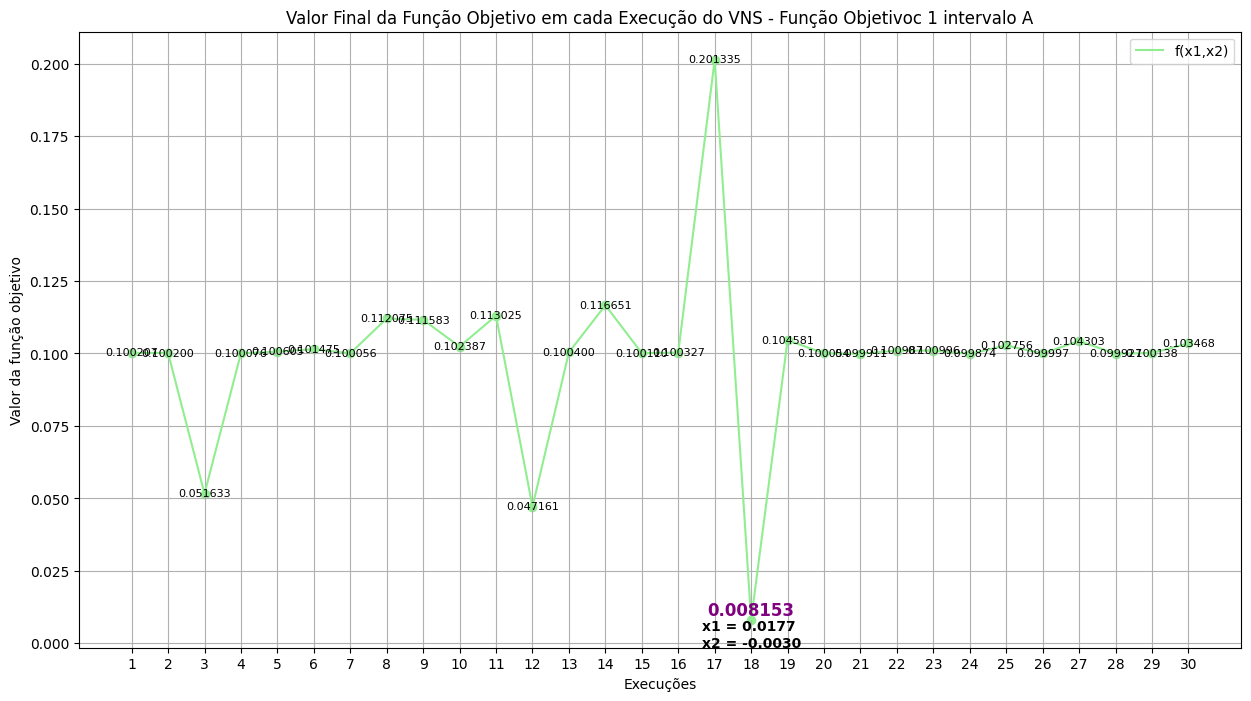

In [73]:
objetivoFinalCadaIteracao(vns_1a, 'f(x1,x2)', 'VNS - Função Objetivoc 1 intervalo A')

#### Intervalo 1B

In [86]:
vns_1b = {'x1':[], 'x2':[], 'f(x1,x2)':[]} 

min = intervalo1_b[0] 
max = intervalo1_b[1]

qtdVariaveisDecisao = 2

for i in range(30):    
    # Chamada ao algoritmo VNS com a quantidade de variáveis de decisão
    solucao = vns(funcao_objetivo_01, [min] * qtdVariaveisDecisao, [max] * qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    # Armazenando os resultados no dicionário
    vns_1b['x1'].append(solucao[0])  # Adiciona o valor de x1
    vns_1b['x2'].append(solucao[1])  # Adiciona o valor de x2
    vns_1b['f(x1,x2)'].append(funcao_objetivo_01(solucao))  # Calcula e armazena o valor da função objetivo
    
# Imprimindo os resultados
print(vns_1b)

{'x1': [np.float64(-0.6868433239105779), np.float64(-0.029319642990407346), np.float64(0.020160591086025748), np.float64(-1.0021170254354592), np.float64(0.9846428265349921), np.float64(0.8612012427699132), np.float64(-0.836859066667514), np.float64(0.011726156833818169), np.float64(0.021194232048890593), np.float64(0.35981222293803694), np.float64(0.548764781823409), np.float64(0.031991120737017154), np.float64(0.19468571383126138), np.float64(0.9207963109777287), np.float64(0.9817733481659136), np.float64(-0.9526296082218968), np.float64(0.2888118597079805), np.float64(0.11271760370537637), np.float64(0.23230548151130442), np.float64(-0.00883789129494117), np.float64(-0.051846662157287615), np.float64(-0.001518365874873695), np.float64(0.14846910862751309), np.float64(0.05392229891061229), np.float64(-0.030651407279823628), np.float64(0.36637046023419506), np.float64(-0.9872855464523037), np.float64(0.557848051366907), np.float64(0.08755302844990931), np.float64(0.42338687868962577)]

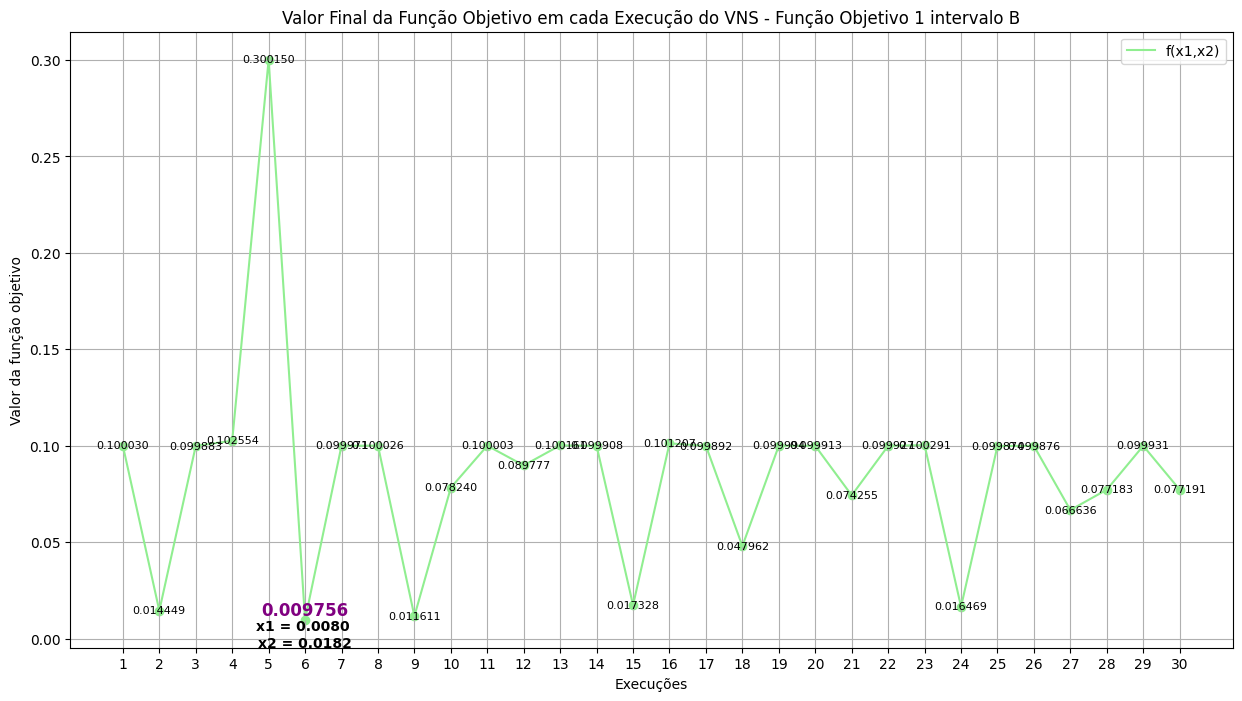

In [85]:
objetivoFinalCadaIteracao(vns_1b, 'f(x1,x2)', 'VNS - Função Objetivo 1 intervalo B')

#### Intervalo 2A

In [87]:
vns_2a = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2a = intervalo2_a[0]  
max_2a = intervalo2_a[1]

qtdVariaveisDecisao=4

for i in range(30):
    # Chamada ao VNS com a quantidade de variáveis de decisão definida como 4
    solucao = vns(funcao_objetivo_02, [min_2a]* qtdVariaveisDecisao, [max_2a]* qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    # Armazenando os resultados no dicionário
    vns_2a['x1'].append(solucao[0])
    vns_2a['x2'].append(solucao[1])
    vns_2a['x3'].append(solucao[2])
    vns_2a['x4'].append(solucao[3])
    vns_2a['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(solucao))

# Imprimindo os resultados
print(vns_2a)


{'x1': [np.float64(1.0106805402165995), np.float64(0.5722221363314657), np.float64(0.8567679972889017), np.float64(1.275104698219391), np.float64(1.2143543239867154), np.float64(-0.3596402616487222), np.float64(0.3137240692823305), np.float64(1.0694785228537202), np.float64(-0.17367280110763092), np.float64(0.05537947134525334), np.float64(0.6705017838346476), np.float64(0.7376793154625576), np.float64(-0.021653524156948767), np.float64(-0.9659077983062063), np.float64(1.2056472709607633), np.float64(1.3561933904658672), np.float64(1.4226419409225775), np.float64(1.2296019207123856), np.float64(1.4127477330369298), np.float64(-1.0407844718547457), np.float64(1.0373638868992452), np.float64(-0.6318267453346756), np.float64(1.1438059515660428), np.float64(0.7374874832830502), np.float64(0.5821747119058427), np.float64(-0.5207558615339318), np.float64(-0.06039408918396261), np.float64(-1.338040851044085), np.float64(0.639326078974526), np.float64(0.8910364047938857)], 'x2': [np.float64(1.

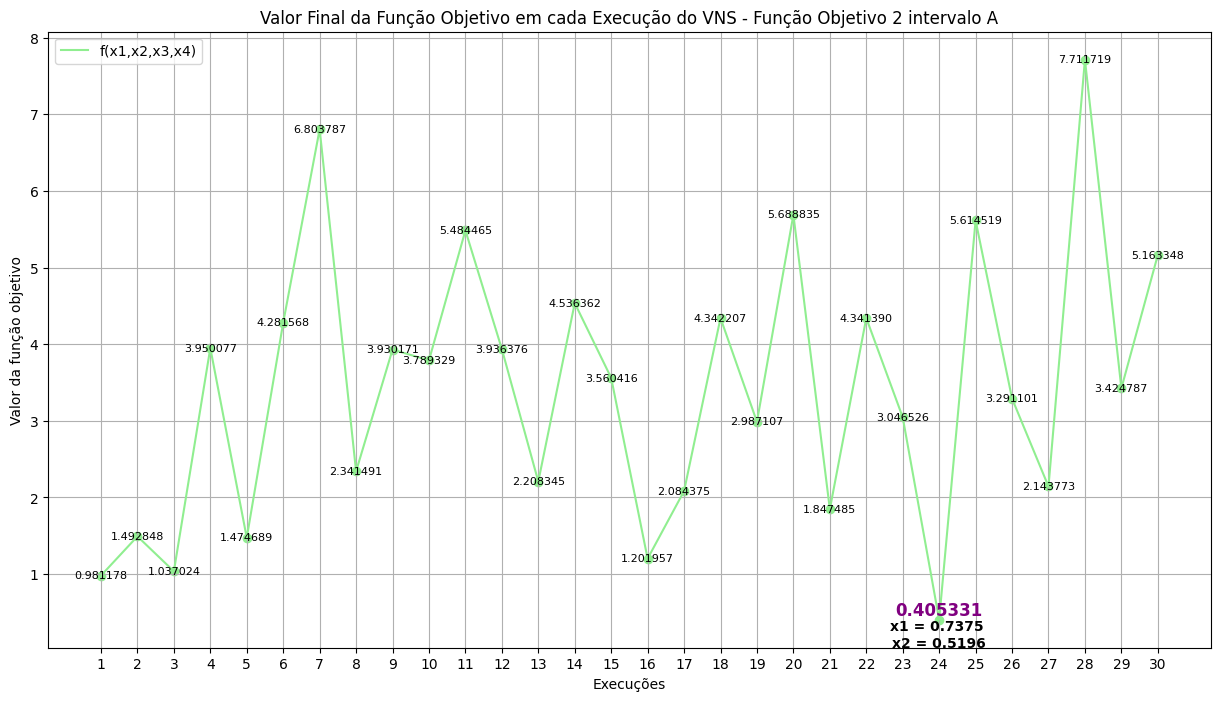

In [88]:
objetivoFinalCadaIteracao(vns_2a, 'f(x1,x2,x3,x4)', 'VNS - Função Objetivo 2 intervalo A')


#### Intervalo 2B

In [89]:
vns_2b = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2b = intervalo2_b[0]  
max_2b = intervalo2_b[1] 

qtdVariaveisDecisao=4

for i in range(30):
    # Chamada ao VNS com a quantidade de variáveis de decisão definida como 4
    solucao = vns(funcao_objetivo_02, [min_2b]*qtdVariaveisDecisao, [max_2b]*qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    # Armazenando os resultados no dicionário
    vns_2b['x1'].append(solucao[0])
    vns_2b['x2'].append(solucao[1])
    vns_2b['x3'].append(solucao[2])
    vns_2b['x4'].append(solucao[3])
    vns_2b['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(solucao))

# Imprimindo os resultados
print(vns_2b)


{'x1': [np.float64(1.1307336502470746), np.float64(-1.0804928903038715), np.float64(0.9150121652487203), np.float64(1.1179370210525856), np.float64(-0.633833751032438), np.float64(1.1230753323209302), np.float64(-1.0577327434664763), np.float64(1.1576967909101696), np.float64(-0.7110804694332734), np.float64(-0.22674728209365344), np.float64(-0.3345300326387469), np.float64(1.1043574479546039), np.float64(1.1114756714278344), np.float64(1.4098905256488772), np.float64(1.055824194705062), np.float64(1.0034900708518786), np.float64(0.7137358586437136), np.float64(0.7910198384062002), np.float64(-1.0340012120772768), np.float64(0.4942524057121668), np.float64(0.9243911601115283), np.float64(-0.09360197112205029), np.float64(1.0124447920452635), np.float64(1.0421241080397516), np.float64(-1.0992755210630567), np.float64(1.286471678739257), np.float64(-1.00965651857181), np.float64(1.1053142298315075), np.float64(-1.0987384904276574), np.float64(1.115136832786225)], 'x2': [np.float64(1.3268

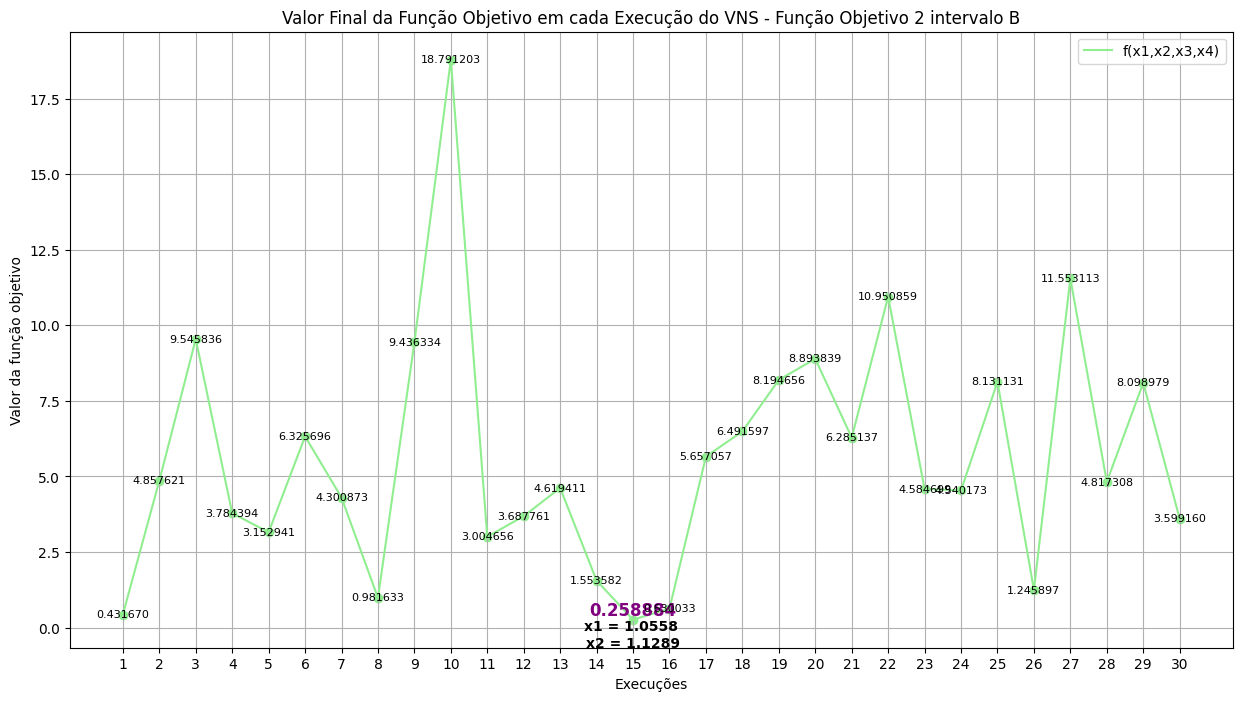

In [90]:
objetivoFinalCadaIteracao(vns_2b, 'f(x1,x2,x3,x4)', 'VNS - Função Objetivo 2 intervalo B')

#### Função para exibir o boxplot

In [ ]:
def exibirBoxplot(resultadosComparar, titulo, cor):
    fig, ax = plt.subplots(figsize=(6, 4))

    sns.boxplot(y=resultadosComparar, ax=ax, color=cor)

    ax.set_title('VNS', fontsize=10, fontweight='bold')
    ax.set_ylabel('Valor da Função Objetivo', fontsize=10)

    fig.suptitle(titulo, fontsize=12, fontweight='bold')

    plt.show()


    """def exibirBoxplot(resultadosComparar, titulo, cor):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    sns.boxplot(y=resultadosComparar[0], ax=ax1, color=cor)
    sns.boxplot(y=resultadosComparar[1], ax=ax2, color=cor)

    ax1.set_title('SA', fontsize=10, fontweight='bold')
    ax1.set_ylabel('Valor da Função Objetivo', fontsize=10)
    ax2.set_title('ILS', fontsize=10, fontweight='bold')
    
    fig.suptitle(titulo, fontsize=10, fontweight='bold')

    plt.show()"""

#### Função para gerar as estatisticas

In [101]:
def estatisticas(resultadosComparar, nome_funcao_objetivo):
    estatisticas = {'algoritmo': [], 'minimo': [], 'maximo': [], 'media': [], 'dp': [], 'x_do_minimo': [], 'y_do_minimo': []}
   
    algoritmos = ['VNS']  # Aqui só tem VNS, mas depois adicione SA se necessário

    for i, resultado in enumerate(resultadosComparar):
        objetivo = resultado[nome_funcao_objetivo]
        estatisticas['algoritmo'].append(algoritmos[i])
        estatisticas['minimo'].append(np.min(objetivo))
        estatisticas['maximo'].append(np.max(objetivo))
        estatisticas['media'].append(np.mean(objetivo))
        estatisticas['dp'].append(np.std(objetivo))
        indice_minimo = np.argmin(objetivo)
        estatisticas['x_do_minimo'].append(resultado['x1'][indice_minimo])  # Para x1
        estatisticas['y_do_minimo'].append(resultado['x2'][indice_minimo])  # Para x2
    
    return pd.DataFrame(estatisticas)

  algoritmo    minimo    maximo     media        dp  x_do_minimo  y_do_minimo
0       VNS  0.012929  0.106424  0.082224  0.031635    -0.008838    -0.021454


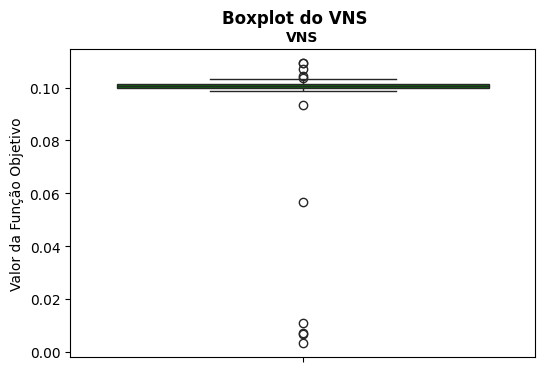

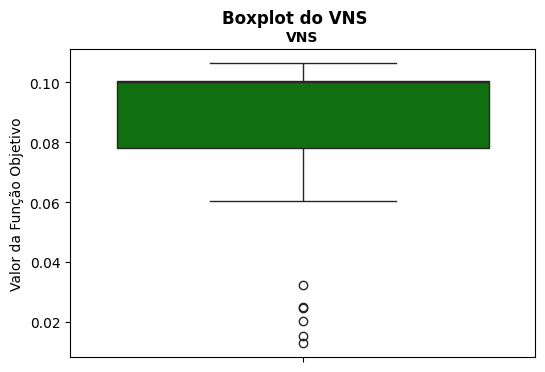

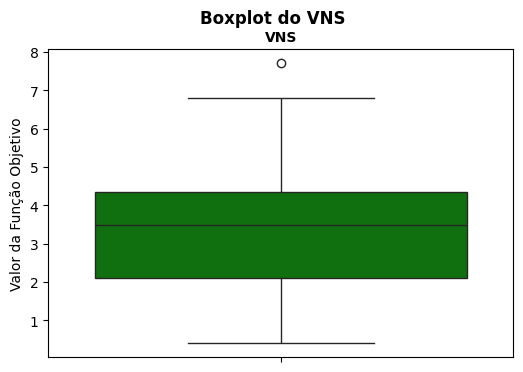

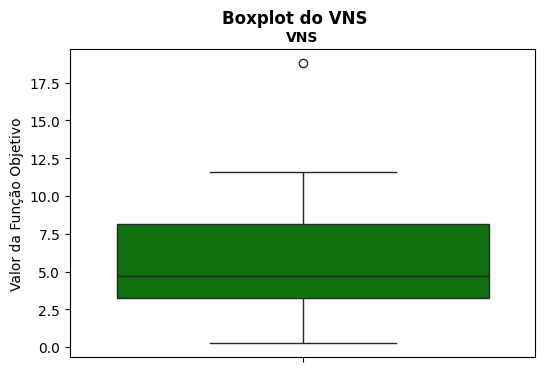

In [ ]:
# Calcular as estatísticas para o VNS e o SA posteriormente
estatisticas_vns = estatisticas([vns_1b], 'f(x1,x2)')

print(estatisticas_vns)

#resultadosComparar 
exibirBoxplot(vns_1a['f(x1,x2)'], 'Boxplot do VNS', 'green')
exibirBoxplot(vns_1b['f(x1,x2)'], 'Boxplot do VNS', 'green')
exibirBoxplot(vns_2a['f(x1,x2,x3,x4)'], 'Boxplot do VNS', 'green')
exibirBoxplot(vns_2b['f(x1,x2,x3,x4)'], 'Boxplot do VNS', 'green')

### 2.2 Simulated Annealing (SA)

#### 2.2.1. Conceito do Algoritmo

O **Simulated Annealing** é inspirado no processo de recozimento em metalurgia:

1- **Temperatura alta** → Aceita soluções piores (exploração).

2- **Temperatura baixa** → Aceita apenas melhoras (exploitation).

3- **Resfriamento gradual** → Reduz a temperatura ao longo do tempo.

#### 2.2.2 Passos do algorítmo

```python
# 1. INICIALIZAÇÃO
x_atual ← SOLUÇÃO_ALEATÓRIA(limites, dimensao)  # Gera solução inicial
f_atual ← funcao_objetivo(x_atual)
T ← 1000                                        # Temperatura inicial
alpha ← 0.95                                    # Taxa de resfriamento
historico_melhores ← [f_atual]                  # Armazena histórico

# 2. LOOP TERMAL PRINCIPAL
ENQUANTO T > 0.01 FAÇA:
    PARA i DE 1 ATÉ 100 FAÇA:                   # Iterações por temperatura
        
        # 2.1 GERAÇÃO DE VIZINHO
        x_vizinho ← PERTURBA(x_atual, limites)
        f_vizinho ← funcao_objetivo(x_vizinho)
        delta ← f_vizinho - f_atual
        
        # 2.2 CRITÉRIO DE ACEITAÇÃO
        SE delta < 0 OU rand() < exp(-delta/T) ENTÃO:
            x_atual ← x_vizinho                 # Atualiza solução
            f_atual ← f_vizinho
            
            # 2.3 ATUALIZA MELHOR SOLUÇÃO
            SE f_atual < MIN(historico_melhores):
                melhor_x ← x_atual
                melhor_f ← f_atual
    
    # 2.4 RESFRIAMENTO
    T ← T * alpha                               # Reduz temperatura
    historico_melhores.APPEND(f_atual)          # Registra progresso

RETORNE melhor_x, melhor_f                      # Solução final

#### 2.2.3 Implementação em Python

##### 2.2.3.1 Classe do Simulated Annealing

In [63]:
class SimulatedAnnealing:
    def __init__(self, dimensao, limites, funcao_objetivo):
        self.d = dimensao
        self.limite_inf = limites[0]
        self.limite_sup = limites[1]
        self.funcao_objetivo = funcao_objetivo
    
    def solucao_inicial(self):
        return np.random.uniform(self.limite_inf, self.limite_sup, self.d)
    
    def gerar_vizinho(self, x_atual, passo_max):
        perturbacao = np.random.uniform(-passo_max, passo_max, self.d)
        x_vizinho = x_atual + perturbacao
        return np.clip(x_vizinho, self.limite_inf, self.limite_sup)
    
    def executar(self, n_execucoes = 30, T_inicial = 1000, T_final = 0.01, alpha = 0.95, iteracoes_T = 150, passo_max = None):
        if passo_max is None:
            passo_max = (self.limite_sup - self.limite_inf) * 0.1 # Usa 10% como o padrão
        
        resultados = []
        melhores_x = []
        
        for _ in range(n_execucoes):
            x_atual = self.solucao_inicial()
            f_atual = self.funcao_objetivo(x_atual)
            T = T_inicial
            melhor_x = x_atual.copy()
            melhor_f = f_atual
            
            while T > T_final:
                for _ in range(iteracoes_T):
                    x_vizinho = self.gerar_vizinho(x_atual, passo_max)
                    f_vizinho = self.funcao_objetivo(x_vizinho)
                    
                    delta_f = f_vizinho - f_atual
                    
                    if delta_f < 0 or np.random.random() < math.exp(-delta_f / T):
                        x_atual, f_atual = x_vizinho, f_vizinho
                        
                        if f_atual < melhor_f:
                            melhor_f = f_atual
                            melhor_x = x_atual.copy()
                
                T *= alpha  # Resfriamento
            
            resultados.append(melhor_f)
            melhores_x.append(melhor_x)
        
        return {
            'resultados': np.array(resultados),
            'melhores_x': np.array(melhores_x),
            'media': np.mean(resultados),
            'minimo': np.min(resultados),
            'maximo': np.max(resultados),
            'desvio': np.std(resultados)
        }

#### 2.2.4 Execução para Todos os Problemas

##### 2.2.4.1 Configuração dos Problemas

In [64]:
problemas = [
    {'nome': '1 a) d = 2 [-100,100]', 'd': 2, 'limites': (-100, 100)},
    {'nome': '1 b) d = 2 [-20,20]', 'd': 2, 'limites': (-20, 20)},
    {'nome': '2 c) d = 4 [-10,10]', 'd': 4, 'limites': (-10, 10)},
    {'nome': '2 d) d = 4 [-2,2]', 'd': 4, 'limites': (-2, 2)}
]

##### 2.2.4.2 Execução e Análise


 === 1 a) d = 2 [-100,100] ===
Média: 0.100158
Mínimo: 0.012837
Máximo: 0.153673
Desvio padrão: 0.019674
Melhor x encontrado: [-0.0031609  -0.02289508]


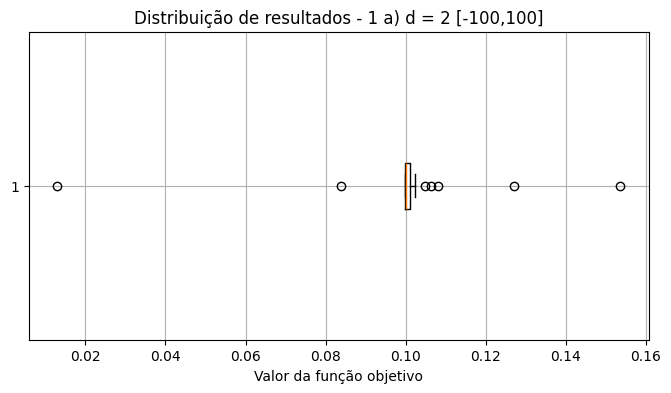


 === 1 b) d = 2 [-20,20] ===
Média: 0.042547
Mínimo: 0.004130
Máximo: 0.099881
Desvio padrão: 0.032864
Melhor x encontrado: [0.01067982 0.00580383]


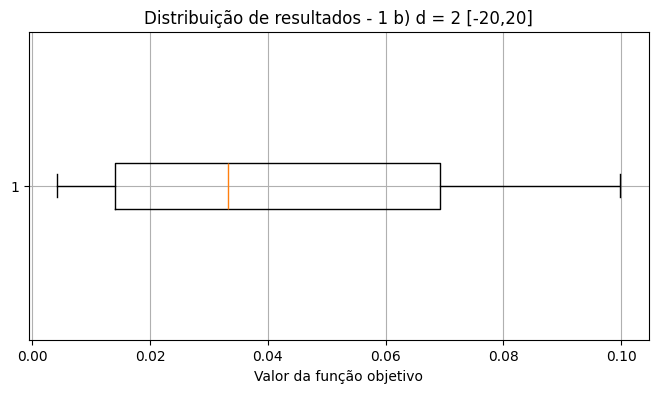


 === 2 c) d = 4 [-10,10] ===
Média: 0.100031
Mínimo: 0.099873
Máximo: 0.102433
Desvio padrão: 0.000455
Melhor x encontrado: [-0.26116369 -0.46176089 -0.02318707  0.84445042]


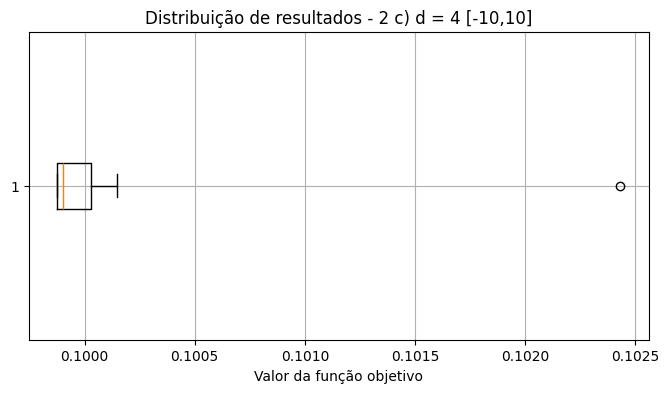


 === 2 d) d = 4 [-2,2] ===
Média: 0.099876
Mínimo: 0.099873
Máximo: 0.099900
Desvio padrão: 0.000006
Melhor x encontrado: [-0.90997843 -0.30303551  0.26711082  0.06079477]


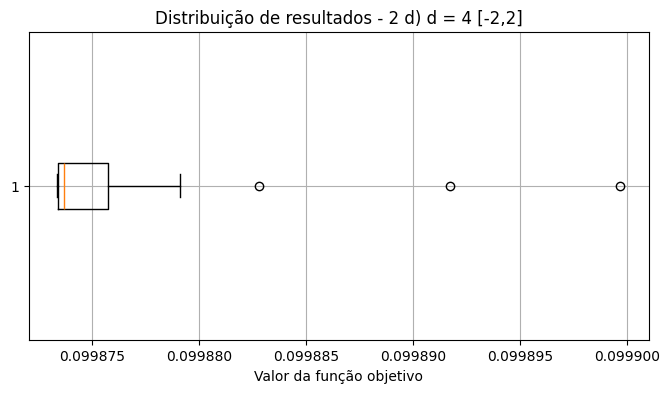

In [65]:
n_execucoes = 30
T_inicial = 1000

for problema in problemas:
    print(f"\n === {problema['nome']} ===")
    
    # Ajuste automático de parâmetros
    intervalo = problema['limites'][1] - problema['limites'][0]
    passo_max = intervalo * 0.1  # Passo inicial = 10% do intervalo

    # Define qual função objetivo usar
    funcao = funcao_objetivo_01 if problema['d'] == 2 else funcao_objetivo_01

    # Executa SA
    sa = SimulatedAnnealing(
        dimensao = problema['d'],
        limites = problema['limites'],
        funcao_objetivo = funcao
    )
    
    resultado = sa.executar(
        n_execucoes = n_execucoes,
        T_inicial = T_inicial,
        passo_max = passo_max
    )
    
    valores_objetivo = resultado['resultados']
    melhores_x = resultado['melhores_x']
    
    # Estatísticas
    media = resultado['media']
    minimo = resultado['minimo']
    maximo = resultado['maximo']
    desvio = resultado['desvio']
    melhor_x_global = melhores_x[np.argmin(valores_objetivo)]

    # Exibição dos resultados
    print(f"Média: {media:.6f}")
    print(f"Mínimo: {minimo:.6f}")
    print(f"Máximo: {maximo:.6f}")
    print(f"Desvio padrão: {desvio:.6f}")
    print(f"Melhor x encontrado: {melhor_x_global}")
    
    # Boxplot
    plt.figure(figsize=(8, 4))
    plt.boxplot(valores_objetivo, vert=False)
    plt.title(f"Distribuição de resultados - {problema['nome']}")
    plt.xlabel("Valor da função objetivo")
    plt.grid(True)
    plt.show()
